# <**Batch Normalization**>



# I. 개념




## 1.**배치 정규화**란?

학습 과정에서 각 batch 단위 별로 데이터가 다양한 분포를 가지더라도 각 batch 별로 평균과 분산을 이용해 정규화하는 것을 뜻한다.


신경망 학습 시에 Gradient 기반의 방법들은 파라미터의 작은 변화가 결과에 큰 영향을 끼치지 못하는 경우가 있다. Gradient의 변화량이 너무 작아지거나 커지는 경우에는 신경망을 효과적으로 학습시키지 못하고, Error rate가 낮아지는 대신 수렴해버릴 수 있다. 

이러한 Gradient Vanishing/Exploding problem을 해결하기 위해 도입한 방법이 활성화 함수이다. 활성화 함수는 매우 비선형적인 방법을 통해 입력 값을 작은 범위에서 squashing 해버린다. 그러나 이렇게 되면 기존의 값이 너무 작은 범위로 매핑되어버린다는 문제가 생긴다. 물론 ReLU와 Leaky ReLU는 이 문제를 해결하는 방안이 될 수 있겠지만, 이런 간접적인 방법이 아닌 다른 직접적으로 '학습하는 과정 자체를 전체적으로 안정화'하는 방법으로 학습 속도를 올릴 수도 있다. 그리고 이러한 방법 중 하나가 Batch Normalization이다.

## 2.Batch(배치)

Batch 작업은 데이터를 실시간으로 처리하는 방법이 아닌, 일괄적으로 모아서 처리하는 작업을 의미한다. 그렇기 때문에 batch를 이용하면 특정 시간 이후에는 자원을 거의 소비하지 않는다.

- 대량의 데이터를 처리한다
- 특정 시간에 프로그램을 처리한다.
- 일괄적으로 처리한다.


인공지능의 학습에는 대게 엄청난 크기의 데이터가 사용되고, 컴퓨터의 메모리는 한정되어 있으며, 단 한번의 학습으로는 충분한 정확도의 인공지능을 만들기 어렵기 때문에 batch를 사용하게 된다.

 예를 들어 size가 2000인 data가 있고, epoch = 20, batch_size = 500이라고 하면, 1 epoch는 data size가 500인 batch로 4번의 iteration을 거치게 된다. 그리고 전체 dataset에 대해서는 총 20번의 학습이 이루어지게 된다.

일반적인 Gradient descent에서는, 1회의 gradient update를 위해 data를 전부 사용환다. 즉, train data를 전부 집어 넣어 계산한 모든 gradient의 평균을 구해 update를 하는 방법을 이용한다. 그리고 이때, 너무 큰 data를 처리하기 위해 batch를 사용해 처리하는데 이러한 Gradient Descent 종류를 Stochastic Gradient Descent라고 한다.


## 3.Internal covariate shift

Batch Normalization을 사용하는 이유는 DNN의 internal covariate shift를 피하기 위해서이다. Train data를 학습시킬 때, 아무런 규제 없이 학습을 시킨다면, 매개변수 값의 범위가 넓어지게 될 수 있는데, 이렇게 매개변수 값이 심하게 벌어지는 현상을 Interanl Covariate Shift라고 한다. 



예시를 들자면, 아래의 그림과 같이 DNN이 학습한다고 하였을 떄, $H_1$(Hidden layer 1)은 $X_1$을 입력받아 $W_{1}x_{1}$연산 이후, activation funtion을 거쳐 $H_2$에 값을 넘겨주게 된다. 그러나 이런 경우에는 $W_1$의 값에 $H_2$의 input이 굉장히 달라질 수 있다는 것을 의미한다. 

그리고 만일 internal covariate shift와 같은 이유로 overfitting이 일어난다면, classificator의 점수는 처참할 것이다. 이러한 일이 일어나는 것을 막기 위해서는 간단히 data의 분포의 위치와 크기를 변경하여 training dataset과 test dataset의 가중치 분포를 batch normalization을 통해 동일하게 만들어주면 된다.

따라서 batch normalization은 가중치 초깃값 선택의 의존성 또한 해결해줄 수 있으며, overfitting의 위험도 줄일 수 있다.

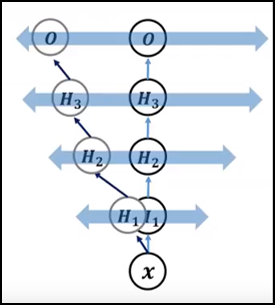

### Covariate(공변량)
Corative는 종속변수에 대하여 독립변수와 기타 잡음인자들이 공유하는 변량을 뜻한다. 즉, 여러 변수들이 공통적으로 함께 공유하는 변량이다. 공변량이 종속변수에 영향을 준다면, 공변량은 통계적으로 통제가 되어야한다. 통계적으로 통제를 하는 '공분산분석'을 통해 공변량이 종속변수에 주는 영향력을 제거할 수 있게 된다.

### Covariate shift
ML에서 train data와 test data의 distribution이 다른 현상을 뜻한다. 즉, $p(x)$는 변화하는데 $p(y|x)$는 그대로인 경우다. 예를 들어 실제 강아지, 고양이 그림을 학습시킨 classifier에게 cartoon 느낌의 고양이와 강아지 이미지를 분류시키도록 하는 것과 같다.

# II. 알고리즘

## 1.표현

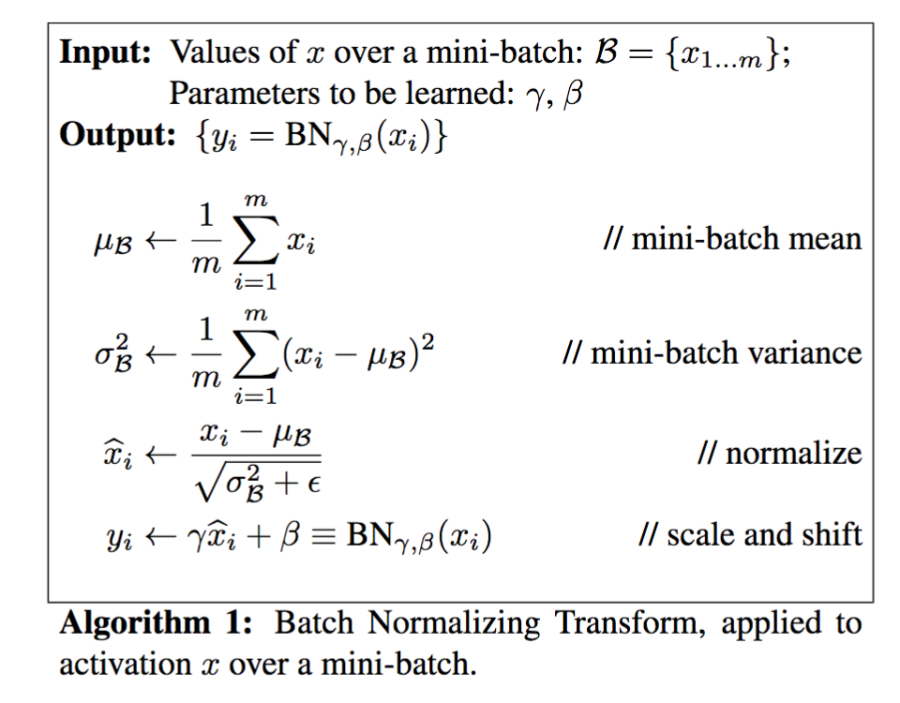

Batch normalization은 학습 시의 미니배치를 한 단위로 정규화하는 것으로 분포의 평균이 0, 분산이 1이 되도록 정규화하는 것이다. 따라서 먼저 Input으로 사용된 미니배치의 평균($μ_B)$과 분산($σ^{2}_{B}$)을 구한다. 그 다음 hidden layer의 활성화값/출력값에 대해서 평균이 0, 분산이 1이 되도록 정규화한다. 해당 알고리즘은 신경망에서 순전파 때 적용된다.

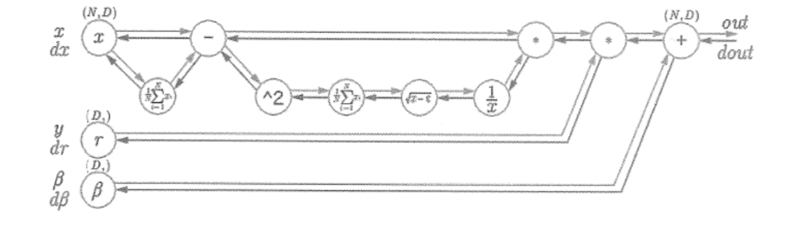

배치 정규화를 사용한 딥러닝에서는 오차함수 $E$에 관해 해당 모델의 매개변수인 γ와 β가 이전 층에 전달할 $x_i$에 대한 경사를 각각 계산해야 한다.


\begin{align} \mathbb{h} = f(W\mathbb{x}+\mathbb{b})\end{align}

미니 배치에 해당하는 식의 처리과정을 $BN_{\gamma,\beta}(W_{x_i)}$라고 한다면, 층의 활성화를 나타내는 식은 다음과 같다.

\begin{align} \mathbb{h} = f(BN_{\gamma,\beta}(W\mathbb{x}_i) )\end{align}

## 2.구현


keras의 batch norm 을 사용한다.

임포팅 & 데이터 정렬

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_test.shape, x_train.shape, y_test.shape, y_train.shape

((10000, 28, 28, 1), (60000, 28, 28, 1), (10000, 10), (60000, 10))

CNN

In [6]:
from keras.layers import BatchNormalization, Dropout, Conv2D, Activation, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
def bn_deep_cnn_advanced():
    model = keras.models.Sequential()

    model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    adam = Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model
bn_model = bn_deep_cnn_advanced()
bn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 50)        500       
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 50)       200       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 28, 28, 50)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 50)        22550     
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 50)       200       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 28, 28, 50)       

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = bn_model.fit(x_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 1)

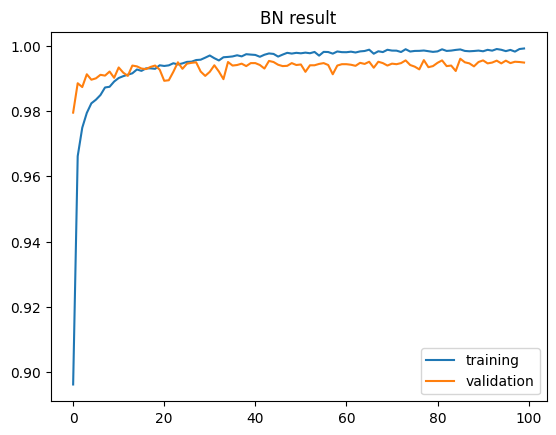

In [8]:
plt.title('BN result')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [9]:
bn_result = bn_model.evaluate(x_test, y_test)
bn_acc = bn_result[1]

313/313 [==============================] - 3s 7ms/step - loss: 0.0435 - accuracy: 0.9959


In [10]:
from keras.layers import BatchNormalization, Dropout, Conv2D, Activation, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
def no_bn_deep_cnn_advanced():
    model = keras.models.Sequential()

    model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    adam = Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model
no_bn_model = no_bn_deep_cnn_advanced()
no_bn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 50)        500       
                                                                 
 activation_12 (Activation)  (None, 28, 28, 50)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 50)        22550     
                                                                 
 activation_13 (Activation)  (None, 28, 28, 50)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 50)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 50)        22550     
                                                      

In [ ]:
no_bn_history = no_bn_model.fit(x_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 1)

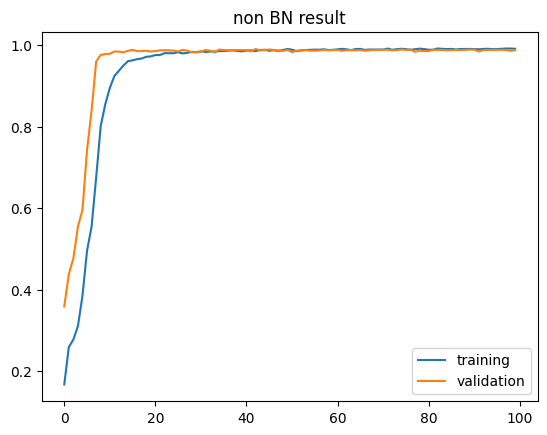

In [12]:
plt.title('non BN result')
plt.plot(no_bn_history.history['accuracy'])
plt.plot(no_bn_history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [13]:
no_bn_result = no_bn_model.evaluate(x_test, y_test)
no_bn_acc = no_bn_result[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.1900 - accuracy: 0.9872


In [14]:
print('With Batch Normalization accuracy :', bn_acc)
print('With No Batch Normalization accuracy :', no_bn_acc)

With Batch Normalization accuracy : 0.9958999752998352
With No Batch Normalization accuracy : 0.9872000217437744


# 참고자료

[배치 정규화 1](https://gaussian37.github.io/dl-concept-batchnorm/)

[배치 정규화 2](https://eehoeskrap.tistory.com/430)

[배치 정규화 3](https://sacko.tistory.com/44)

[배치 정규화 4](https://huangdi.tistory.com/9)

[Internal Covariate Shift 참고자료](https://89douner.tistory.com/44)